In [ ]:
import numpy as np 
import pandas as pd 

df = pd.read_csv(r'/content/Clean_DogeCoin.csv')
df

,Date,Open,High,Low,Close
0,2014-09-17,0.000293,0.000299,0.000260,0.000268
1,2014-09-18,0.000268,0.000325,0.000267,0.000298
2,2014-09-19,0.000298,0.000307,0.000275,0.000277
3,2014-09-20,0.000276,0.000310,0.000267,0.000292
4,2014-09-21,0.000293,0.000299,0.000284,0.000288
...,...,...,...,...,...
2492,2021-07-18,0.186841,0.195788,0.180886,0.182233
2493,2021-07-19,0.181818,0.183950,0.170712,0.173556
2494,2021-07-20,0.173763,0.178895,0.160728,0.170801
2495,2021-07-21,0.170527,0.214210,0.168719,0.190349


In [ ]:
dfneg = -1 * df
dfneg


,Date,Open,High,Low,Close
0,,-0.000293,-0.000299,-0.000260,-0.000268
1,,-0.000268,-0.000325,-0.000267,-0.000298
2,,-0.000298,-0.000307,-0.000275,-0.000277
3,,-0.000276,-0.000310,-0.000267,-0.000292
4,,-0.000293,-0.000299,-0.000284,-0.000288
...,...,...,...,...,...
2492,,-0.186841,-0.195788,-0.180886,-0.182233
2493,,-0.181818,-0.183950,-0.170712,-0.173556
2494,,-0.173763,-0.178895,-0.160728,-0.170801
2495,,-0.170527,-0.214210,-0.168719,-0.190349


#Lasso Regression
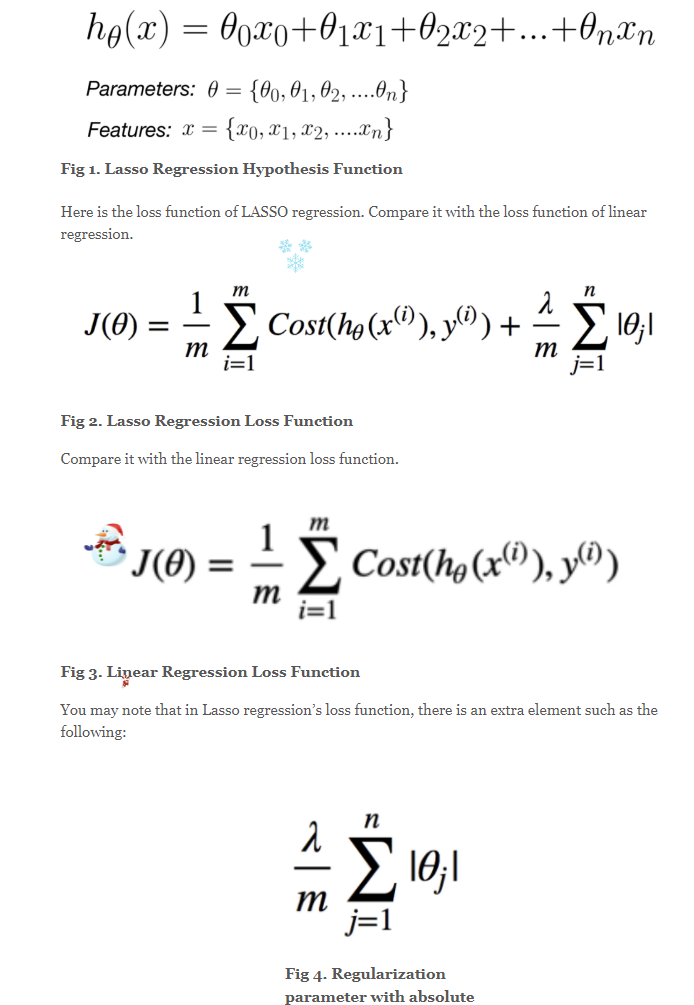

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import time 

X = dfneg[['Low','Open','Close']]
y = dfneg['High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

start = time.time()
lasso = Lasso(alpha=1.0)

lasso.fit(X_train, y_train)

lasso.score(X_test, y_test)

lasso_cv = LassoCV(cv=5)

lasso_cv.fit(X, y)

acc = lasso_cv.score(X, y)

end= time.time()

print("Time taken by the Lasso Regression model is :",(end-start))
print("Accuracy of the Lasso Regression Model is :", acc)

Time taken by the Lasso Regression model is : 0.10682845115661621
Accuracy of the Lasso Regression Model is : 0.9962011530488094


#Elastic Net Regression


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
import math
import time

dfnum = df.iloc[:,1:]
data = dfnum.values
X, y = data[:, :-1], data[:, -1]

start = time.time()
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
end = time.time()

scores = abs(scores)
print("Mean MAE: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))
print("Accuracies :",scores)
print("Time taken :", (end-start))

Mean MAE: 0.027 (0.003)
Accuracies : [0.02830641 0.02660016 0.02483349 0.03525707 0.0203132  0.02905556
 0.02437812 0.02506153 0.02657257 0.02850101 0.02524004 0.02485035
 0.02632915 0.02818223 0.0260482  0.02603803 0.03288961 0.02699156
 0.02983201 0.02234394 0.0254619  0.02864341 0.02757634 0.023456
 0.02536347 0.02523936 0.02651263 0.02761587 0.0277643  0.03114915]
Time taken : 1.176344394683838


In [ ]:

from sklearn.linear_model import ElasticNet
dfnum = df.iloc[:,1:]
data = dfnum.values
X, y = data[:, :-1], data[:, -1]

model = ElasticNet(alpha=1.0, l1_ratio=0.5)

model.fit(X, y)

row = [0.0028,0.043,0.0069]

yhat = model.predict([row])

print('Predicted: %.3f' % yhat)

Predicted: 0.016


#Ransac Model

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


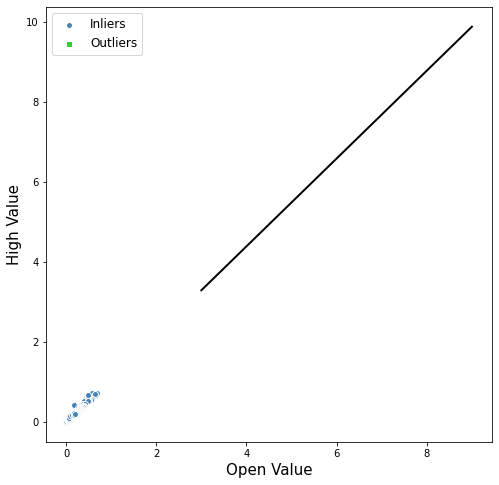

Time taken by the RANSAC regression aglorithm is : 0.02482151985168457
Accuracy of the RANSAC regression algorithm is 0.9849955662382477


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import time
X = dfnum['Open'].to_numpy().reshape(-1, 1)
y = dfnum['High'].to_numpy().reshape(-1, 1)
start = time.time()
ransac = RANSACRegressor(base_estimator=LinearRegression(),min_samples=50, max_trials=100,loss='absolute_loss', random_state=42,residual_threshold=10)

ransac.fit(X, y)
acc = ransac.score(X,y)
end = time.time()
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(8, 8))
plt.scatter(X[inlier_mask], y[inlier_mask],c='steelblue', edgecolor='white',marker='o', label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask],c='limegreen', edgecolor='white',marker='s', label='Outliers')

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Open Value', fontsize=15)
plt.ylabel('High Value', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()

print("Time taken by the RANSAC regression aglorithm is :", (end-start))
print("Accuracy of the RANSAC regression algorithm is", acc)

#Least Angle Regression Model

Lars()
[-0.94091048  0.82848698  1.10959348]
MSE: 0.00
RMSE: 0.00


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


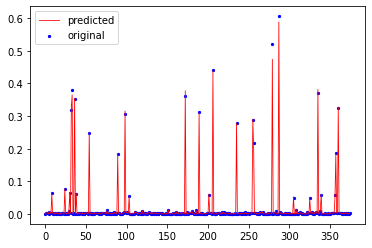

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoLars(alpha=0.1)
[0. 0. 0.]
MSE: 0.01
RMSE: 0.07


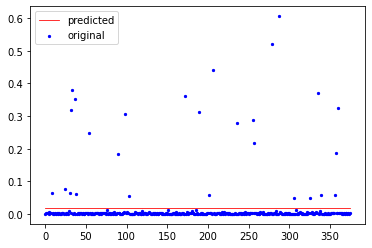

Accuracy of Lars model is : 0.996561934166805
Time taken by the lars model is : 0.39669370651245117


In [ ]:
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

start = time.time()
x, y = df[['Low','Open','Close']], df['High']
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

lars = linear_model.Lars().fit(xtrain, ytrain)
print(lars)
print(lars.coef_)

ypred = lars.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % math.sqrt(mse))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

lassolars = linear_model.LassoLars(alpha =.1).fit(xtrain, ytrain)
print(lassolars) 
print(lassolars.coef_)

ypred = lassolars.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % math.sqrt(mse))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

acc = lars.score(xtrain,ytrain)
end = time.time()
print("Accuracy of Lars model is :",acc)
print("Time taken by the lars model is :",(end-start))